In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Import Packages
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Scalar:
    
    """
    Basic unit of storing a single scalar value and its gradient
    """
    
    def __init__(self, data, _children=()):
        """
        
        """
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._backward = lambda: None
    
    def __add__(self, other):
        """
        Args:
            other (Any): Node to add with the class
        
        Returns:
            out (callable): Function to referesh the gradient
        """
        other = other if isinstance(other, Scalar) else Scalar(other)
        out = Scalar(self.data + other.data, (self, other))

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
   
    def __mul__(self, other):
        """
        Multiplication operation 
        """
        other = other if isinstance(other, Scalar) else Scalar(other)
        out = Scalar(self.data * other.data, (self, other))

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out 

    
    def __pow__(self, other):
        """
        Power operation 
        """
        assert isinstance(other, (int, float))
        out = Scalar(self.data**other, (self,))

        def _backward():
            self.grad += other * (self.data**(other-1)) * out.grad
        out._backward = _backward

        return out 
    
    def relu(self):
        """
        ReLU activation function applied to the current Value
        """
        out = Scalar(0 if self.data < 0 else self.data, (self,))

        def _backward():

            self.grad += (out.data > 0) * out.grad

        out._backward = _backward

        return out 
    
    
    def exp(self):
        """
        Exponentiate the current Value
        """
        out = Scalar(np.exp(self.data), (self,))

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out 
    
    def log(self):
        """
        Take the natural logarithm of the current Value
        """
        out = Scalar(np.log(self.data), (self, ))

        def _backward():
            self.grad += self.data**(-1) * out.grad
        out._backward = _backward

        return out 
    
    def backward(self):
        """
        Run backpropagation from the current Value
        """
        def topo_list_builder():

          topo, node_visit = list(), set()

          def add_node(node):
            if node not in node_visit:
              node_visit.add(node)
              for children in node._prev:
                add_node(children)
              topo.append(node)

          add_node(self)

          return topo

        self.grad = 1
        topo = topo_list_builder()
        topo.reverse()
        for v in topo:
            v._backward()
        

    def __neg__(self): 
        """
        Negate the current Value
        """
        return self * -1

    def __radd__(self, other): 
        """
        Reverse addition operation 
        """
        return self + other
    
    def __sub__(self, other): 
        """
        Subtraction operation
        """
        return self + (-other)
    
    def __rsub__(self, other): 
        """
        Reverse subtraction operation
        """
        return other + (-self)
    
    def __rmul__(self, other): 
        """
        Reverse multiplication operation
        """
        return self * other
    
    def __truediv__(self, other): 
        """
        Division operation
        """
        return self * other**-1
    
    def __rtruediv__(self, other): 
        """
        Reverse diction operation
        """
        return other * self**-1
    
    def __repr__(self):
        """
        Class representation 
        """
        return f"Value(data={self.data}, grad={self.grad})"

In [ ]:
## Initialize Example scalar
w1 = Scalar(0.3)
w2 = Scalar(-0.5)
x1 = Scalar(0.2)
x2 = Scalar(0.4)
# Calculate gradient from backward propagation
a = w1**2
b = w2**2
c = a + b
d = 0.5 * c
e = w1 * x1
g = w2 * x2 
h = e + g
r = (-1)*h
o = r.exp()
p = o + 1
q = 1 / (p)
f = q + d
f.backward()
print('f: ', f)
print('Gradient of f: ', f.grad)
print('q: ', q)
print('Graident of q: ', q.grad)
print('d: ', d)
print('Graident of d: ', d.grad)
print('p: ', p)
print('Gradient of p: ', p.grad)
print('o: ', o)
print('Gradient of o: ', o.grad)
print('r: ', r)
print('Gradient of r: ', r.grad)
print('h: ', h)
print('Gradient of h: ', h.grad)
print('e: ', e)
print('Gradient of e: ', e.grad)
print('g', g)
print('Gradient of g: ', g.grad)
print('d: ', d)
print('Gradient of d: ', d.grad)
print('c: ', c)
print('Gradient of c: ', c.grad)
print('b: ', b)
print('Gradient of b: ', b.grad)
print('a: ', a)
print('Gradient of a: ', a.grad)
print('Gradient of w1: ', w1.grad)
print('Gradient of w2: ', w2.grad)
print('Gradient of x1: ', x1.grad)
print('Gradient of x2: ', x2.grad)



f:  Value(data=0.6350570548417855, grad=1)
Gradient of f:  1
q:  Value(data=0.4650570548417855, grad=1)
Graident of q:  1
d:  Value(data=0.16999999999999998, grad=1)
Graident of d:  1
p:  Value(data=2.1502737988572274, grad=-0.21627806425811547)
Gradient of p:  -0.21627806425811547
o:  Value(data=1.1502737988572274, grad=-0.21627806425811547)
Gradient of o:  -0.21627806425811547
r:  Value(data=0.14, grad=-0.24877899058367)
Gradient of r:  -0.24877899058367
h:  Value(data=-0.14, grad=0.24877899058367)
Gradient of h:  0.24877899058367
e:  Value(data=0.06, grad=0.24877899058367)
Gradient of e:  0.24877899058367
g Value(data=-0.2, grad=0.24877899058367)
Gradient of g:  0.24877899058367
d:  Value(data=0.16999999999999998, grad=1)
Gradient of d:  1
c:  Value(data=0.33999999999999997, grad=0.5)
Gradient of c:  0.5
b:  Value(data=0.25, grad=0.5)
Gradient of b:  0.5
a:  Value(data=0.09, grad=0.5)
Gradient of a:  0.5
Gradient of w1:  0.34975579811673396
Gradient of w2:  -0.400488403766532
Gradie

# Neural Network training
 

In [ ]:
from numpy.core.numeric import outer
class Module:
    
    """
    Base Model Module
    """
    def parameters(self):
        return []

    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

class LinearLayer(Module):
    
    """
    Linear Layer
    """
    
    def __init__(self, nin, nout): 
        self.w = []
        for i in range(nin):
            w_tmp = [Scalar(random.uniform(-1,1)) for j in range(nout)]
            self.w.append(w_tmp)
        self.b = [Scalar(0) for i in range(nout)]
        self.nin = nin
        self.nout = nout
  
    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]
        
        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout] 
        """

        batch_size = len(x)
        
        w_dot_x = [[sum(xi * wi for xi, wi in zip(xr, wr)) for wr in zip(*self.w)] for xr in x]

        out = [[w_dot_x[i][j] + self.b[j] for j in range(self.nout)] for i in range(batch_size)]

        return out 
         
  
    def parameters(self):
        """
        Get the list of parameters in the Linear Layer
        
        Args:
            None
        
        Returns:
            params (list): List of parameters in the layer
        """
        return [p for row in self.w for p in row] + [p for p in self.b]

Test the implementation of linear layer

In [ ]:
## Initialization of Layer with Weights
linear_model_test = LinearLayer(4, 4)
linear_model_test.w = [[Scalar(data=0.7433570245252463), Scalar(data=-0.9662164096144394), Scalar(data=-0.17087204941322653), Scalar(data=-0.5186656374983067)], 
                       [Scalar(data=-0.1414882837892344), Scalar(data=-0.5898971049017006), Scalar(data=-0.3448340220492381), Scalar(data=0.5278833226346107)], 
                       [Scalar(data=0.3990701306597799), Scalar(data=-0.3319058654296163), Scalar(data=-0.784797384411202), Scalar(data=0.7603317495966846)], 
                       [Scalar(data=-0.5711035064293541), Scalar(data=-0.0001937643033362857), Scalar(data=0.12693226232877053), Scalar(data=-0.36044237239197097)]]
linear_model_test.b = [Scalar(data=0), Scalar(data=0), Scalar(data=0), Scalar(data=0)]

## Forward Pass
x_test = [[-0.17120438454836173, -0.3736077734087335, -0.48495413054653214, 0.8269206715993096]]
y_hat_test = linear_model_test(x_test)
y_ref = [[Scalar(data=-0.7401928625441141), Scalar(data=0.5466095223360173), Scalar(data=0.6436403600545564), Scalar(data=-0.7752067527386406)]]
## Error Calculation
predict_error = 0
for i in range(4):
   predict_error += (y_hat_test[0][i] - y_ref[0][i])**2
print(predict_error.data)

0.0


### Loss functions for neural network training 

In [ ]:
def softmax(y_hat):
    """
    Softmax computation
    
    Args:
        y_hat (2d-list): 2-dimensional list of Values with shape [batch_size, n_class]
    
    Returns:
        s (2d-list): 2-dimensional list of Values with the same shape as y_hat    
    """
    batch_size = len(y_hat)
    n_class = len(y_hat[0])
    expo_y = [[y_hat[i][j].exp() for j in range(n_class)] for i in range(batch_size)]
    s = []
    for i in range(batch_size):
        s_r = []
        exp_sum = Scalar(data=0)
        for j in range(n_class):
            exp_sum += expo_y[i][j]
        for j in range(n_class):
            s_r.append(expo_y[i][j] / exp_sum)
        s.append(s_r)
    return s  


In [ ]:
def cross_entropy_loss(y_hat, y):
    """
    Cross-entropy Loss computation
    
    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]
    
    Returns:
        loss (Value): Loss value of type Value
    """   
    batch_size = len(y_hat)
    n_class = len(y_hat[0])
    y_poss = softmax(y_hat)
    y_refo_p = [[- y_poss[i][j].log() for j in range(n_class)] for i in range(batch_size)]
    total_loss = Scalar(data = 0)
    for i in range(batch_size):
        for j in range(n_class):
            if y[i] == j: total_loss += y_refo_p[i][j]
    loss = total_loss / batch_size

    return loss

In [ ]:
def accuracy(y_hat, y):
    """
    Accuracy computation
    
    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]
    
    Returns:
        acc (float): Accuracy score
    """
    batch_size = len(y)
    n_class = len(y_hat[0])
    num_corr = 0
    for i in range(batch_size):
        prd_v = y_hat[i][y[i]]
        flag = True
        for j in range(n_class):
            if prd_v.data >= y_hat[i][j].data:
                flag = True
            else: 
                flag = False
                break
        if flag is True:
            num_corr += 1
    acc = num_corr / batch_size  
    return acc 

Test the loss function 

In [ ]:
## Ground Truth + Forward Pass
y_gt = [1]
y_hat_test = linear_model_test(x_test)
prob_test = softmax(y_hat_test)
prob_ref = [[0.10441739448437284, 0.37811510516540814, 0.4166428991676558, 0.10082460118256342]]
softmax_error = 0
for i in range(4):
    softmax_error += (prob_ref[0][i] - prob_test[0][i])**2
print(softmax_error.data)

## Cross Entropy Loss Calculation
loss_test = cross_entropy_loss(y_hat_test, y_gt)
loss_ref = Scalar(data=0.9725566186970217)
print((loss_test - loss_ref).data)

## Update Gradient Based on Loss
linear_model_test.zero_grad()
loss_test.backward()
w_gradient_ref = [[-0.017876715758840547, 0.10646942068007896, -0.07133109112844363, -0.01726161379279479], 
                  [-0.0390111502584479, 0.23234103087567629, -0.1556610258645873, -0.03766885475264107], 
                  [-0.05063764675610328, 0.30158564847453107, -0.2020526949142369, -0.04889530680419089], 
                  [0.08634490197366762, -0.5142494748940867, 0.3445306259968013, 0.08337394692361787]]
b_gradient_ref = [0.10441739448437282, -0.6218848948345919, 0.4166428991676557, 0.1008246011825634]
## Compute Error
w_gradient_error = 0
b_gradient_error = 0
for i in range(4):
    b_gradient_error += (linear_model_test.b[i].grad - b_gradient_ref[i]) ** 2
    for j in range(4):
        w_gradient_error += (linear_model_test.w[i][j].grad - w_gradient_ref[i][j]) ** 2
print(w_gradient_error)
print(b_gradient_error)

0.0
0.0
0.0
0.0


Visualize the ground truth and the decision boundary.

In [ ]:
def plot_points(X, Y, scale, n, data):
    """
    Plot points in the visualization image
    """
    points_color = [[0., 0. , 255.], [255., 0., 0.], [0., 255., 0.],[0., 0. , 0.]]
    
    for i in range(X.shape[0]):
            c1 = int((X[i][0] + scale) / (scale * 2 / n))
            c2 = int((X[i][1] + scale) / (scale * 2 / n))
            class_label = int(Y[i])
            for j in range(3):
              data[c1][c2][j] = points_color[class_label][j]   
    return data


def plot_background(scale, n, model):
    """
    Color the background in the visualization image
    """

    background_color = [[0., 191., 255.], [255., 110., 180.], [202., 255., 112.],[156., 156., 156.]]

 
    data = np.zeros((n,n,3), dtype='uint8')

    for i in range(n):
        x1 = -scale + 2 * scale / n * i
        for j in range(n):
            x2 = -scale + 2 * scale / n * j
            input = [[Scalar(x1),Scalar(x2)]]
            y_pred = model(input)
            max_poss = None
            class_label = None
            for a in range(len(y_pred[0])):
                if not max_poss:
                    max_poss = y_pred[0][a].data
                    class_label = a
                elif y_pred[0][a].data > max_poss:
                    max_poss = y_pred[0][a].data
                    class_label = a
            for b in range(3):
                data[i][j][b] = background_color[class_label][b]
    return data

def visualization(X, Y, model):
    """
    Decision boundary visualization
    """
    scale = 4.5  # the scale of X axis and Y axis
    n = 300      # seperate the image into n*n pixels 

    data = plot_background (scale, n, model)
   
    data = plot_points (X, Y, scale, n, data)
    
    plt.imshow(data)
    plt.axis('off')
    plt.show()

In [ ]:
def train(x,
          y,
          model,
          loss_function=cross_entropy_loss, 
          accuracy_function=accuracy,
          max_iteration=500,
          learning_rate=1):
    """
    Args:
       x (2-d list): List of Values with shape: [n_samples, n_channels]
       y (1-d list): List of integers with shape: [n_samples]
       model (Module): Linear model
       loss_function (callable): Loss function to use during training
       accuracy_function (callable): Function used for calculating training accuracy
       max_iteration (int): Number of epochs to train model for
       learning_rate (numeric): Step size of the gradient update
    """
    for i in range(max_iteration):

        y_hat = model(x)
        loss = cross_entropy_loss(y_hat, y)
        acc = accuracy(y_hat, y)

        model.zero_grad()
        loss.backward()

        for p in model.parameters():
            p.data -= learning_rate * p.grad

        if i % 20 == 19:
            print("iteration",i,"loss:",loss.data, "accuracy:",acc)
        ## record loss
        if i == 0 :
        # initialize L
            L = loss.data
            A = acc
        else:
            L = np.append(L,loss.data)
            A = np.append(A,acc)
    
    ## Plot Loss and Accuracy
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.show()


(100, 2) (100,) [0 1 2 3]
iteration 19 loss: 0.5675427657305332 accuracy: 0.95
iteration 39 loss: 0.4177864689433749 accuracy: 0.96
iteration 59 loss: 0.3475019354074304 accuracy: 0.97
iteration 79 loss: 0.30424548725276107 accuracy: 0.98
iteration 99 loss: 0.2740834062405217 accuracy: 0.98
iteration 119 loss: 0.25145715338141833 accuracy: 0.99
iteration 139 loss: 0.23364293000298764 accuracy: 0.99
iteration 159 loss: 0.21912504724915757 accuracy: 0.99
iteration 179 loss: 0.20698317104582334 accuracy: 0.99
iteration 199 loss: 0.19662156110825282 accuracy: 0.99
iteration 219 loss: 0.18763520082834784 accuracy: 0.99
iteration 239 loss: 0.1797378116153055 accuracy: 0.99
iteration 259 loss: 0.17272052907452076 accuracy: 0.99
iteration 279 loss: 0.16642690277747998 accuracy: 0.99
iteration 299 loss: 0.16073710506332994 accuracy: 0.99
iteration 319 loss: 0.15555758988352691 accuracy: 0.99
iteration 339 loss: 0.15081410949290056 accuracy: 1.0
iteration 359 loss: 0.1464468722166137 accuracy: 1

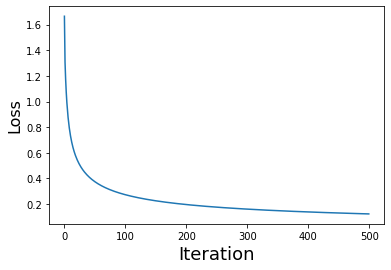

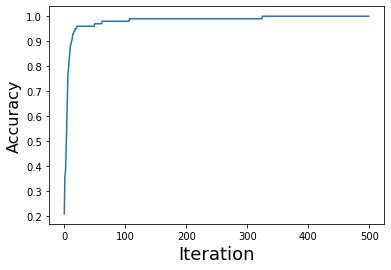

In [ ]:
## Load Dataset
datapath = '/content/drive/My Drive/Q3_data.npz'
data = np.load(datapath)

## Load Data and Parse Shape Information
X = data['X']
Y = data['Y']
print(X.shape, Y.shape, np.unique(Y))
nin = X.shape[1]
nout = np.max(Y) + 1

## Initialize data 
x = [[Scalar(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

## Initialize a Linear Model
linear_model = LinearLayer(nin, nout)

## Train the Model 
train(x, y, linear_model)

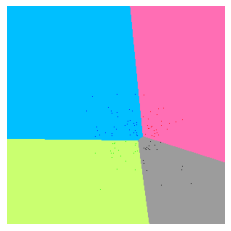

In [ ]:
visualization(X, Y, linear_model)

In [ ]:
## Load Dataset 
datapath = '/content/drive/My Drive/Q4_data.npz'
data = np.load(datapath)

## Parse Data and Identify Dimensions
X = data['X']
Y = data['Y']
nin = X.shape[1]
nout = int(np.max(Y)) + 1

## Initialize data 
x = [[Scalar(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

iteration 19 loss: 0.3768932987188556 accuracy: 0.8
iteration 39 loss: 0.3590982655159472 accuracy: 0.8
iteration 59 loss: 0.35138768418814403 accuracy: 0.825
iteration 79 loss: 0.3468552476182405 accuracy: 0.825
iteration 99 loss: 0.3438600416871122 accuracy: 0.825
iteration 119 loss: 0.34174979951582024 accuracy: 0.825
iteration 139 loss: 0.3402004272900199 accuracy: 0.825
iteration 159 loss: 0.3390298059363872 accuracy: 0.825
iteration 179 loss: 0.33812665520562324 accuracy: 0.85
iteration 199 loss: 0.3374186263580078 accuracy: 0.85
iteration 219 loss: 0.33685643358123396 accuracy: 0.85
iteration 239 loss: 0.3364052980787908 accuracy: 0.85
iteration 259 loss: 0.3360400096559446 accuracy: 0.85
iteration 279 loss: 0.3357419076649295 accuracy: 0.85
iteration 299 loss: 0.33549694583500816 accuracy: 0.85
iteration 319 loss: 0.33529440363169893 accuracy: 0.85
iteration 339 loss: 0.3351260016896108 accuracy: 0.85
iteration 359 loss: 0.3349852797402922 accuracy: 0.85
iteration 379 loss: 0.3

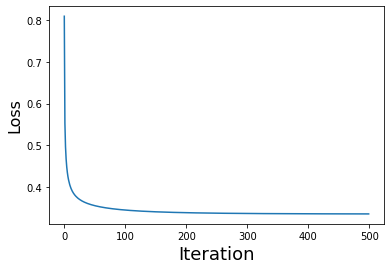

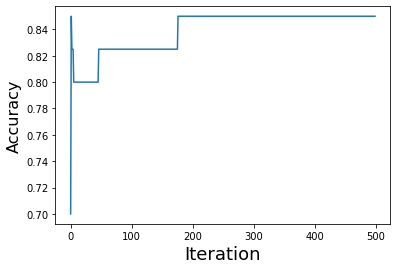

In [ ]:
## Initialize Linear Model
linear_model = LinearLayer(nin, nout)

## Train Model
train(x, y, linear_model)

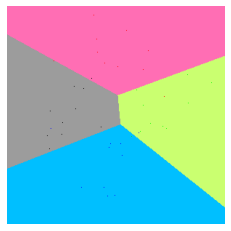

In [ ]:
visualization(X, Y, linear_model)

In [277]:
class MLP(Module):
    
    """
    Multi Layer Perceptron
    """
    def __init__(self, dimensions):
        """
        Initialize multiple layers here in the list named self.linear_layers
        """
        assert isinstance(dimensions, list)
        assert len(dimensions) > 2
        self.linear_layers = []
        for i in range(len(dimensions) - 1):
            self.linear_layers.append(LinearLayer(dimensions[i], dimensions[i+1]))

    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]
        
        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout]
        """
        num_l = len(self.linear_layers)
        x_out = [x]
        for n in range(num_l):
            pro_out = self.linear_layers[n](x_out.pop())
            if n == (num_l - 1): return pro_out
            next_input = [[pro_out[i][j].relu() for j in range(len(pro_out[0]))] for i in range(len(pro_out))]
            x_out.append(next_input)
        return x_out
  
    def parameters(self):
        """
        Get the parameters of each layer
        
        Args:
            None
        
        Returns:
            params (list of Values): Parameters of the MLP
        """
        return [p for layer in self.linear_layers for p in layer.parameters()]
  
    def zero_grad(self):
        """
        Zero out the gradient of each parameter
        """
        for p in self.parameters():
            p.grad = 0

iteration 19 loss: 0.3306487610644256 accuracy: 0.825
iteration 39 loss: 0.30343020310158914 accuracy: 0.9
iteration 59 loss: 0.26920221432224434 accuracy: 0.9
iteration 79 loss: 0.238430417779639 accuracy: 0.925
iteration 99 loss: 0.22599538498035426 accuracy: 0.925
iteration 119 loss: 0.21345149302602398 accuracy: 0.925
iteration 139 loss: 0.19826615681781895 accuracy: 0.925
iteration 159 loss: 0.18482138612261612 accuracy: 0.925
iteration 179 loss: 0.18439171224804576 accuracy: 0.925
iteration 199 loss: 0.1597581174407659 accuracy: 0.925
iteration 219 loss: 0.15461822921465618 accuracy: 0.925
iteration 239 loss: 0.14383775091932738 accuracy: 0.925
iteration 259 loss: 0.16128271052144028 accuracy: 0.925
iteration 279 loss: 0.1618334509468405 accuracy: 0.95
iteration 299 loss: 0.15009374358605473 accuracy: 0.95
iteration 319 loss: 0.12403272772593538 accuracy: 0.95
iteration 339 loss: 0.14636352319366358 accuracy: 0.95
iteration 359 loss: 0.1370511329355529 accuracy: 0.95
iteration 37

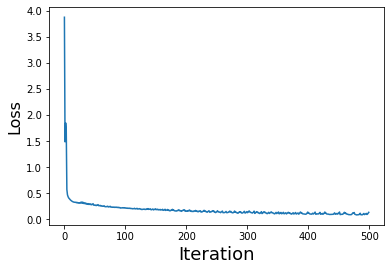

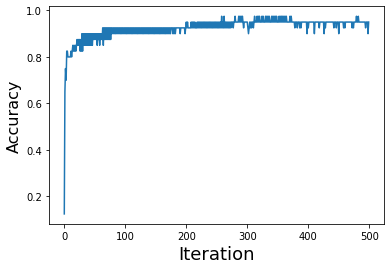

In [278]:
## Initialize MLP 
mlp_model = MLP([nin, 40, nout])

## Train the MLP
train(x, y, mlp_model)

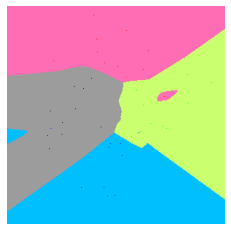

In [ ]:
visualization(X, Y, mlp_model)